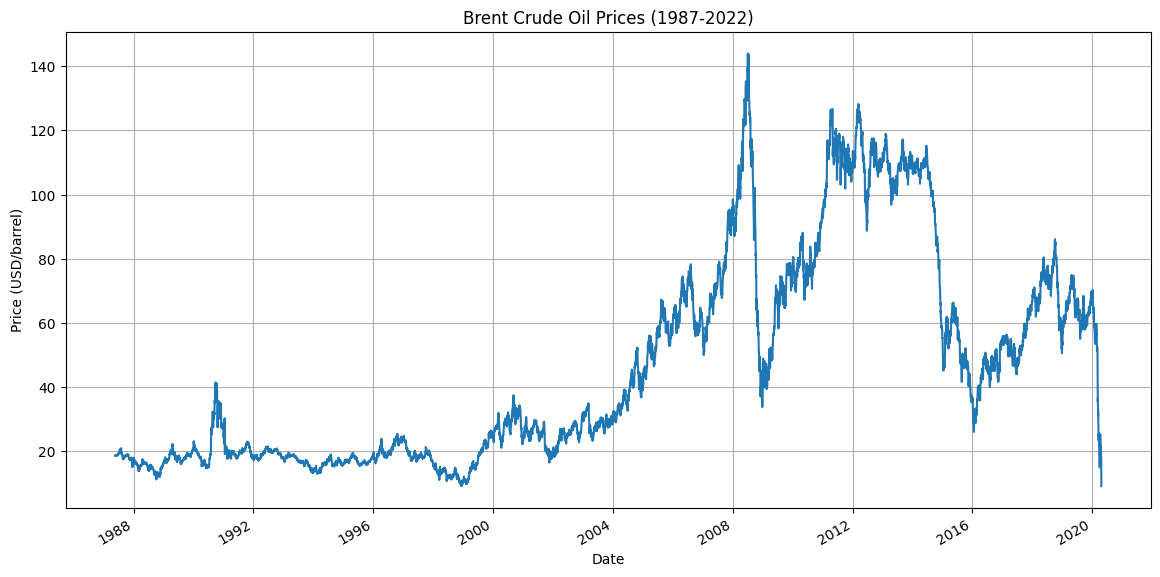

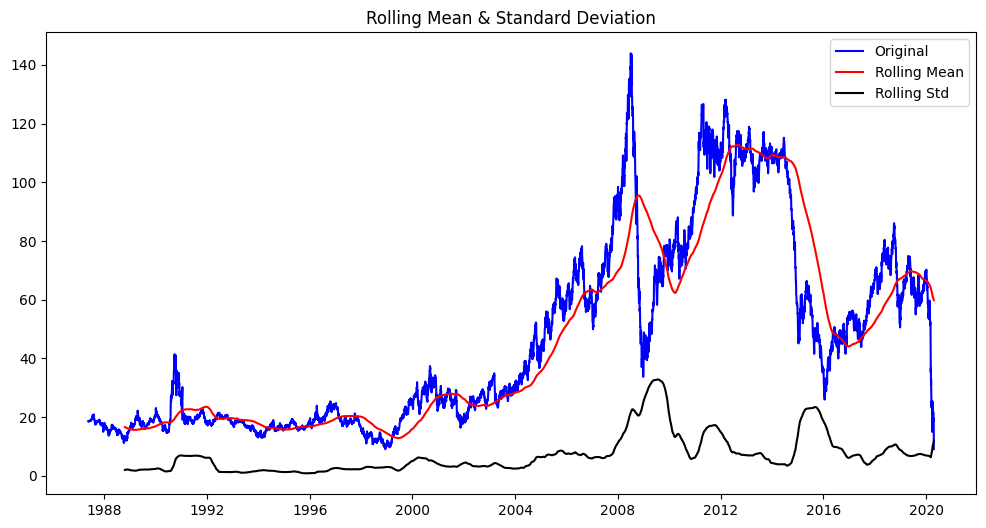

Results of Dickey-Fuller Test:
Test Statistic                   -2.018653
p-value                           0.278455
#Lags Used                       34.000000
Number of Observations Used    8325.000000
Critical Value (1%)              -3.431136
Critical Value (5%)              -2.861887
Critical Value (10%)             -2.566955
dtype: float64


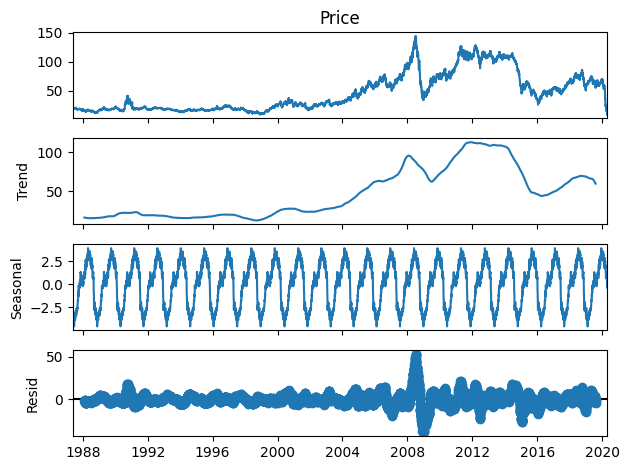

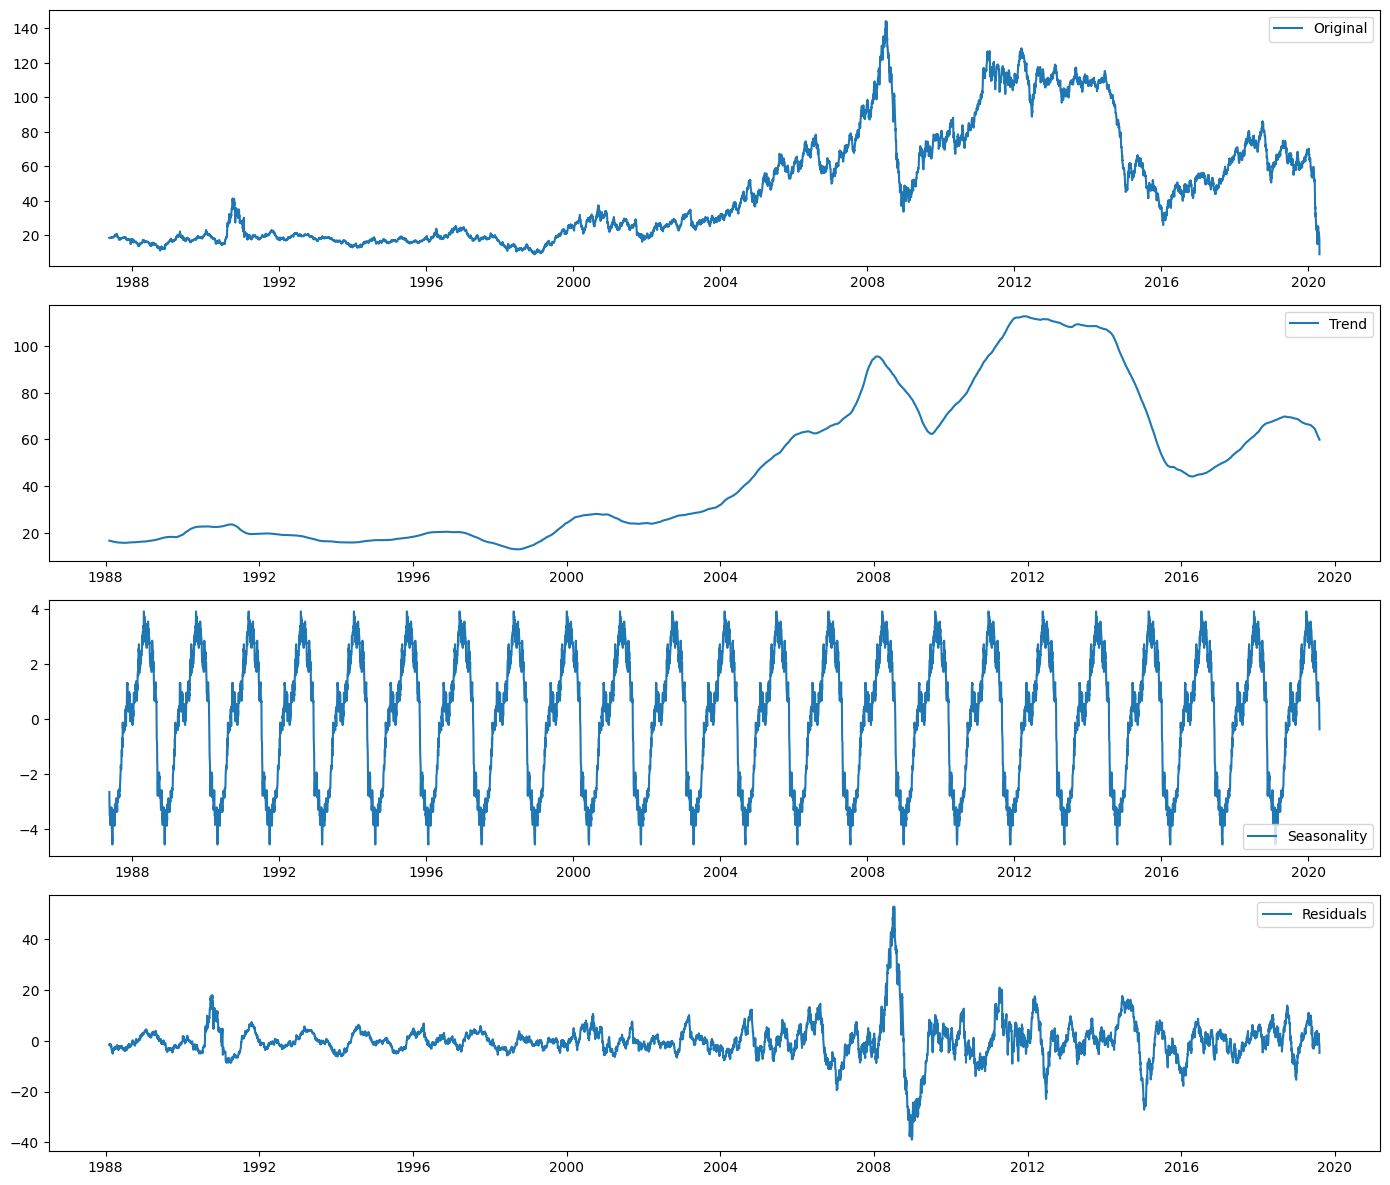

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import os

# Create directories if they don't exist
os.makedirs('../reports/figures', exist_ok=True)

# Load processed data 
price_data = pd.read_csv('../data/processed/brent_clean.csv', parse_dates=['Date'], index_col='Date')

# Plot the price data
plt.figure(figsize=(14, 7))
price_data['Price'].plot(title='Brent Crude Oil Prices (1987-2022)')
plt.ylabel('Price (USD/barrel)')
plt.grid(True)
plt.savefig('../reports/figures/price_trend.png')
plt.show()

# Stationarity test
def test_stationarity(timeseries):
    # Rolling statistics
    rolmean = timeseries.rolling(window=365).mean()
    rolstd = timeseries.rolling(window=365).std()
    
    # Plot rolling statistics
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.savefig('../reports/figures/rolling_stats.png')
    plt.show()
    
    # Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic','p-value','#Lags Used',
                                'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)
    return dfoutput

stationarity_results = test_stationarity(price_data['Price'].dropna())

# Time series decomposition
decomposition = seasonal_decompose(price_data['Price'].interpolate(), period=365)
decomposition.plot()
plt.savefig('../reports/figures/decomposition.png')
plt.show()

# Plot components separately
plt.figure(figsize=(14, 12))
plt.subplot(411)
plt.plot(price_data['Price'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('../reports/figures/decomposition_components.png')
plt.show()

# Save stationarity test results
stationarity_results.to_csv('../reports/stationarity_test_results.csv')